# Reconhecimento_Digitos

Aluno: mig
Descrição: Versão refatorada para estudo — nomes padronizados e comentários ajustados.



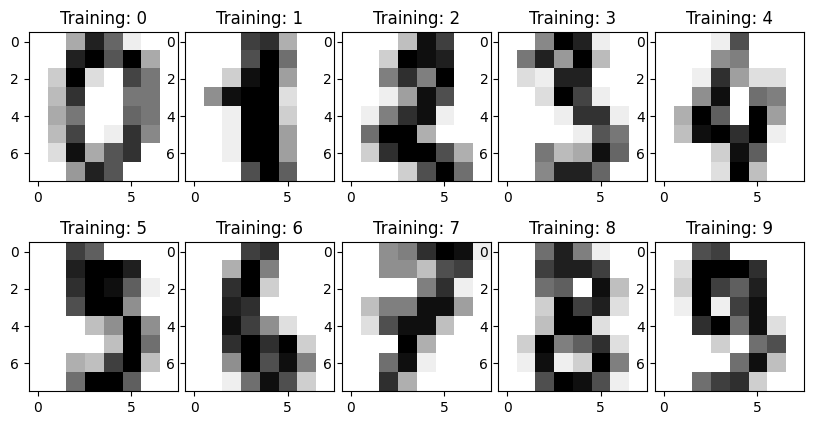

In [18]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load data
digits = load_digits()
X = digits.images
y = digits.target

_, axes = plt.subplots(2,5, figsize=(10,5))
axes = axes.ravel()
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    plt.subplots_adjust(wspace=0.05)

In [19]:
# Import datasets, classificadores e metricas de performance
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [20]:
# Flatten das imagens
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Criando um classificador
clf = svm.SVC(gamma=0.001)

# Separando 50% treino e 50% testes
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

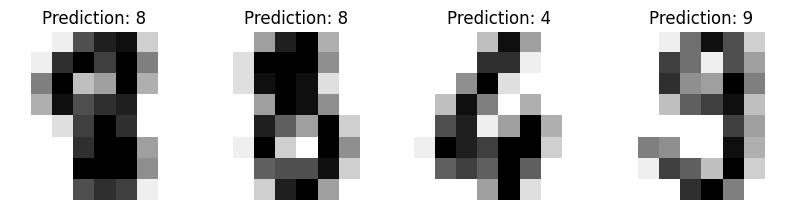

In [21]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [22]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [23]:
import numpy as np
import tensorflow
from PIL import Image

In [24]:
image_path = '/content/numero.png'

In [25]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')
    image = image.resize((28, 28))
    image = np.array(image)
    image = image.reshape(1, 28, 28, 1).astype('float32') / 255
    return image

In [26]:
# Construir a rede neural
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
def predicted_image_label(image_path, model):
  image = preprocess_image(image_path)
  prediction = model.predict(image)
  predicted_class = np.argmax(prediction)
  predicted_label = labels[predicted_class]
  return predicted_label

In [28]:
labels = ['zero', 'um', 'dois', 'três', 'quatro', 'cinco', 'seis', 'sete', 'oito', 'nove']
predicted_label = predicted_image_label(image_path, model)
print(f"A imagem é prevista como: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
A imagem é prevista como: três
